# <span style="color:green"> Numerical Simulation Laboratory (NSL) Exercise 4 Results </span>

## 04.1

1. <span style="color:red">Improve the MD code by enabling the **possibility** to **(re)start** reading not only a spatial configuration file but also a **velocity file**</span> (files: <font face="Courier">velocity.0</font> and <font face="Courier">velocity.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities in the velocity file in order to match a desired temperature</span>.

We show the result for the exercise as it was in the previous academic year, because it was already completed and the new exercise set up remain unnoted for an oversight until too late.

The resultes for our code are presented below. If we start the simulation from a random velocity distribution with block averaging, as shown from the potential energy evaluation, the situation does not vary thanks to rescaling.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

params = {'figure.figsize': (15,8),
          'axes.labelsize': 15,
          'legend.fontsize': 13,
          'xtick.labelsize': 13,
          'ytick.labelsize': 13,
          'text.usetex': True,
          'font.family': 'serif',
          'font.size': 15,
          'text.latex.preamble': r'\usepackage[sc]{mathpazo}'}
plt.rcParams.update(params)


def plot_config(configuration):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML
    
    fig = plt.figure() 
    ax = fig.add_subplot(111, projection='3d')
    x,y,z = np.loadtxt('MolecularDynamics_NVE/config.0', unpack=True)
    if configuration:
        x,y,z = np.loadtxt('MolecularDynamics_NVE/config.final', unpack=True)
    else:
        x,y,z = np.loadtxt('MolecularDynamics_NVE/config.0', unpack=True)
    #x,y,z = np.loadtxt(f'MolecularDynamics_NVE/frames/config_{i}.xyz', unpack=True, skiprows=2, usecols=(1,2,3))
    ax.scatter(x, y, z)
def plot_rescaled_values(setup):
    sigma = 1.
    Tinv = 1.
    m =1.
    import subprocess
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    
    kb = 1. # Boltzmann constant set to 1
    eps = Tinv * kb

    cwd = os.path.join(os.getcwd(), 'MolecularDynamics_NVE')

    parameters = {
        "temperature": 1.9,
        "n particles": 108,
        "rho": 0.8,
        "cut-off radius": 2.5,
        "time delta": 0.0005,
        "number of steps": 1000,
        "number of blocks": 100,
        "iprint": 1000,
        "read initial velocities": setup,
        "rescale velocities": setup
    }

    solid = {
        'label': 'Solid phase',
        'temperature': 0.8,
        'rho': 1.1,
        'cut-off radius': 2.2
    }
    liquid = {
        'label': 'Liquid phase',
        'temperature': 1.1,
        'rho': 0.8,
        'cut-off radius': 2.5
    }
    gas = {
        'label': 'Gas phase',
        'temperature': 1.2,
        'rho': 0.05,
        'cut-off radius': 5
    }

    x = parameters["number of steps"]/parameters["number of blocks"]*np.arange(parameters["number of blocks"])

    plt.title("Rescale velocity test", fontsize=25, horizontalalignment='center', verticalalignment='top')
    plt.title('Potential energy per particle')
    plt.ylabel(r'$\frac{U}{N}$')
    
    for phase in [solid, liquid, gas]:
        label = phase.pop('label')

        parameters.update(phase)
        with open(cwd + '/input.custom','w') as dat:
            dat.write('\n'.join([str(float(k)) if type(k) is float else str(int(k)) for k in parameters.values()]))
        subprocess.run(['./MolDyn_NVE', 'input.custom'], cwd=cwd)
        epot_mean, epot_err = np.loadtxt(cwd + '/output.dat', unpack=True, usecols=(0,1))
        epot_mean = epot_mean * eps
        epot_err = epot_err * eps
        if setup:
            label = label + ' rescaled'
        plt.errorbar(x, epot_mean, yerr=epot_err, label=label)

        plt.grid(True)
        plt.legend();

    
def MolecularDynamics(molecule_name, sigma, Tinv, m):
    import subprocess
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    
    kb = 1.38064852e-23 # Boltzmann constant
    eps = Tinv * kb

    cwd = os.path.join(os.getcwd(), 'MolecularDynamics_NVE')

    parameters = {
        "temperature": 1.9,
        "n particles": 108,
        "rho": 0.8,
        "cut-off radius": 2.5,
        "time delta": 0.0005,
        "number of steps": 1000,
        "number of blocks": 100,
        "iprint": 1000,
        "read initial velocities": False,
        "rescale velocities": False
    }

    solid = {
        'label': 'Solid phase',
        'temperature': 0.8,
        'rho': 1.1,
        'cut-off radius': 2.2
    }
    liquid = {
        'label': 'Liquid phase',
        'temperature': 1.1,
        'rho': 0.8,
        'cut-off radius': 2.5
    }
    gas = {
        'label': 'Gas phase',
        'temperature': 1.2,
        'rho': 0.05,
        'cut-off radius': 5
    }

    x = parameters["number of steps"]/parameters["number of blocks"]*np.arange(parameters["number of blocks"])

    fig, axes = plt.subplots(3,2, subplot_kw=dict(xlabel='steps'), figsize=(15,18))
    plt.subplots_adjust(hspace = 0.3)
    fig.suptitle(molecule_name, fontsize=25, x=0.5, y=.92, horizontalalignment='center', verticalalignment='top')
    axes = axes.flatten()
    axes[-1].set_visible(False) # we just use 5 plots
    axes[0].set_title('Total energy per particle')
    axes[0].set_ylabel(r'$\frac{E}{N}$')
    axes[1].set_title('Potential energy per particle')
    axes[1].set_ylabel(r'$\frac{U}{N}$')
    axes[2].set_title('Kinetic energy per particle')
    axes[2].set_ylabel(r'$\frac{K}{N}$')
    axes[3].set_title('Temperature')
    axes[3].set_ylabel(r'$T$ [K]')
    axes[4].set_title('Pressure')
    axes[4].set_ylabel(r'$P$')

    for phase in [solid, liquid, gas]:
        label = phase.pop('label')

        parameters.update(phase)
        with open(cwd + '/input.custom','w') as dat:
            dat.write('\n'.join([str(float(k)) if type(k) is float else str(int(k)) for k in parameters.values()]))
        subprocess.run(['./MolDyn_NVE', 'input.custom'], cwd=cwd)
        epot_mean, epot_err, ekin_mean, ekin_err, etot_mean, etot_err, temp_mean, temp_err, pressure_mean, pressure_err = np.loadtxt(cwd + '/output.dat', unpack=True)
        epot_mean = epot_mean * eps
        epot_err = epot_err * eps
        ekin_mean = ekin_mean* eps
        ekin_err = ekin_err * eps
        etot_mean = etot_mean * eps 
        etot_err = etot_err * eps
        temp_mean= temp_mean * Tinv
        temp_err = temp_err * Tinv
        pressure_mean = pressure_mean * eps / sigma**3
        pressure_err = pressure_err * eps / sigma**3
        
        axes[0].errorbar(x, etot_mean, yerr=etot_err, label=label)
        axes[1].errorbar(x, epot_mean, yerr=epot_err, label=label)
        axes[2].errorbar(x, ekin_mean, yerr=ekin_err, label=label)
        axes[3].errorbar(x, temp_mean, yerr=temp_err, label=label)
        axes[4].errorbar(x, pressure_mean, yerr=pressure_err, label=label)

    for ax in axes[:-1]:
        ax.grid(True)
        ax.legend();

The two configuration, in the no-rescaling and rescaling case are:

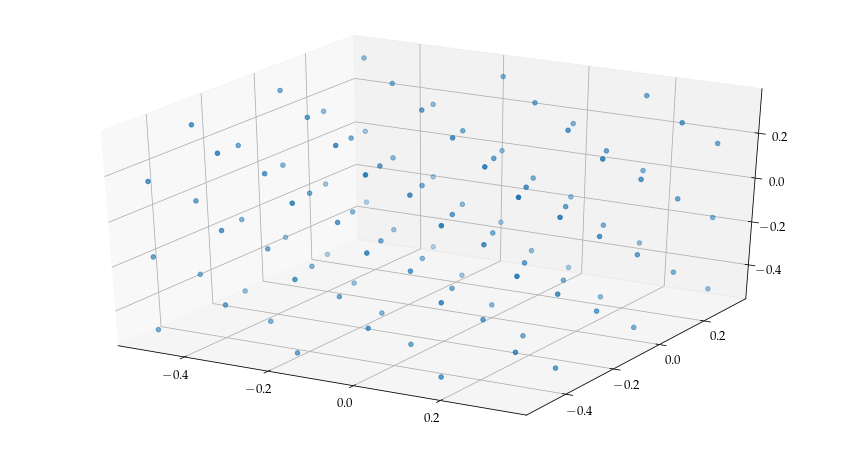

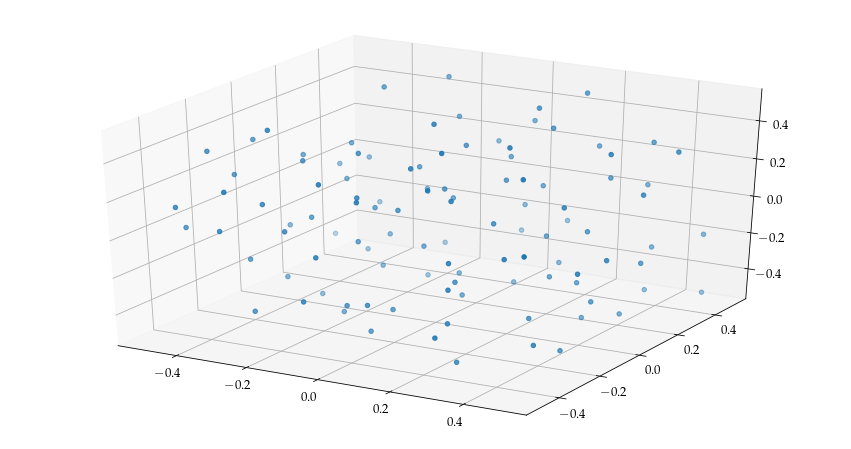

In [2]:
plot_config(False)
plot_config(True)

As presented in the plot below, for the three phase states, after rescaling the two simulations (one without and one with rescaling) present the same block values for the potential energy per particle. 

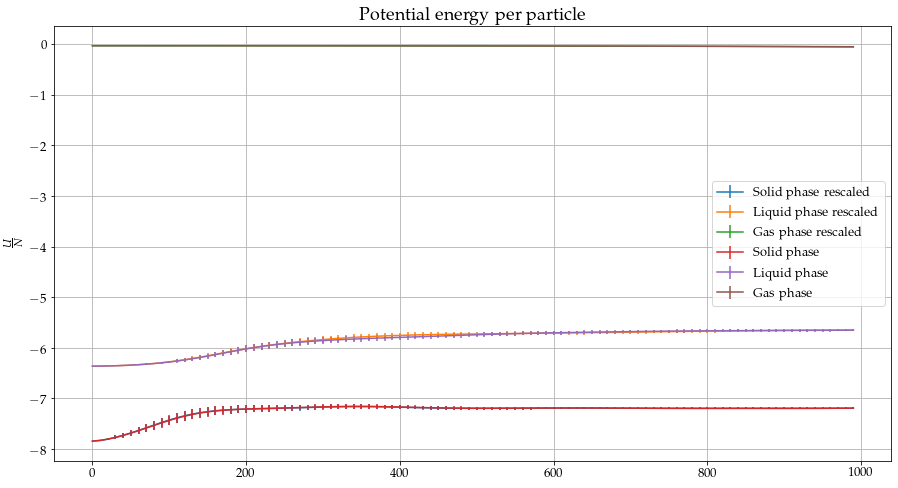

In [9]:
plot_rescaled_values(True)
plot_rescaled_values(False)

## 04.2

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and it is showed in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the pressure $P$ and the temperature, $T$

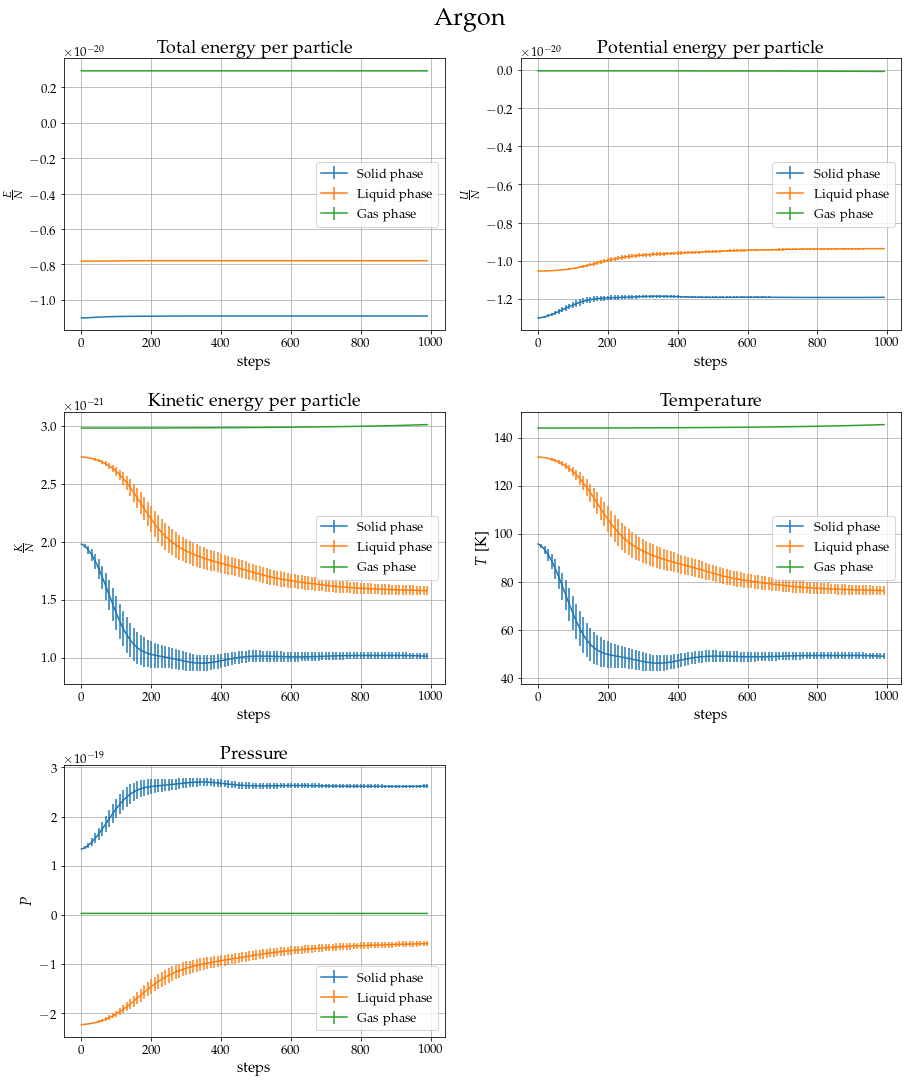

In [22]:
MolecularDynamics('Argon', 0.34, 120, 39.948)

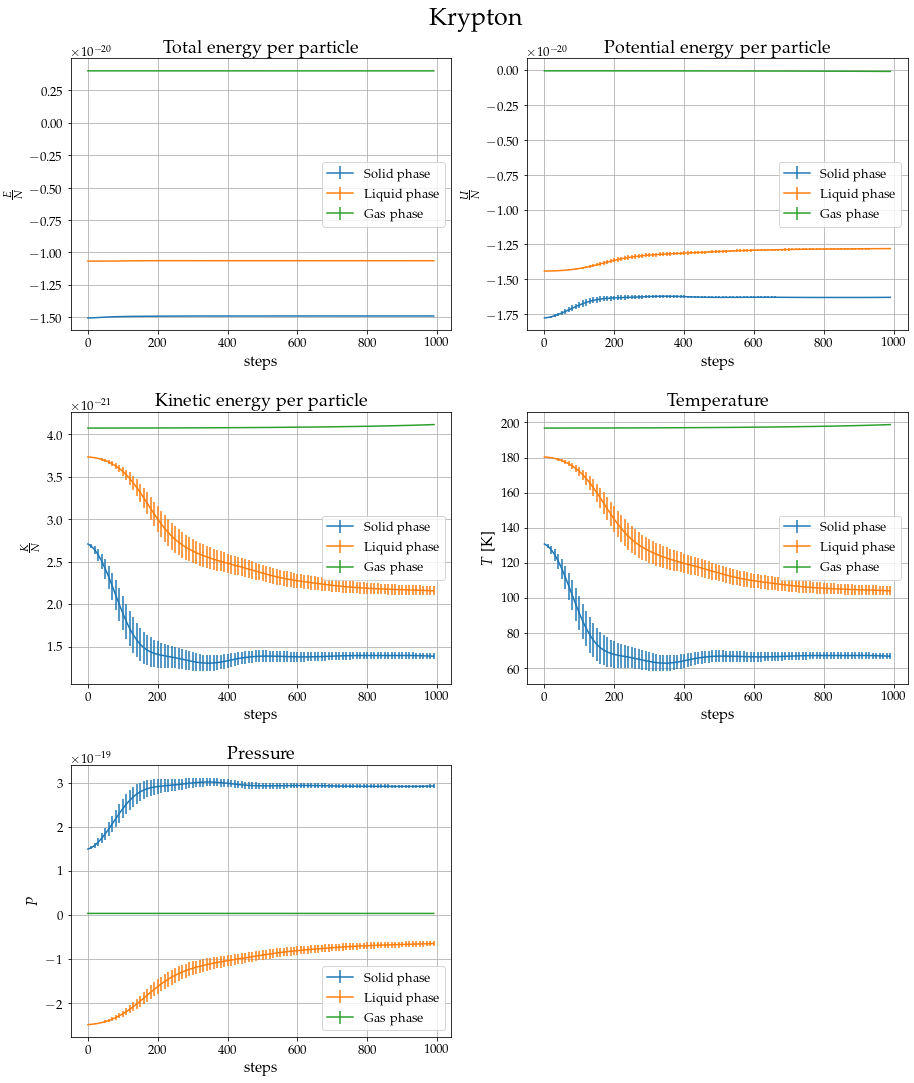

In [10]:
MolecularDynamics('Krypton', 0.364, 164, 83.798)